# Panel Data - EDA Notebook

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings

warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
palette = {'dark_navy': '#001253', 'mid_blue': '#3E6D9C', 'mid_orange': '#FD841F', 'light_blue': '#7FC7D9',
           'dark_orange': '#E14D2A', 'dark_purple': '#2E073F', 'dark_green': '#1A5319'}
palette2 = {'green_teel': '#24A19C', 'lilach': "#9D65C9", 'peach': '#FE7E6D', 'banana': "#FFB961"}

In [3]:
df = pd.read_csv("Project_parts_1_2/lab_treatment_data_30.csv")
df.head()

,time_bin_start,x_mean,y_mean,z_mean,x_std,y_std,z_std,rms,gx_mean,gy_mean,gz_mean,gx_std,gy_std,gz_std,gx_zcr,gy_zcr,gz_zcr,g_rms,hrv_mean,hrv_std,rec_num,user,med
0,36201.893,0.549232,-6.894315,5.570437,2.524867,4.031868,2.342568,5.127150,-0.035071,0.026741,0.001483,1.095502,0.614285,0.605080,0.430108,0.381720,0.419355,0.025477,88.067676,16.691968,13,MIM2028,0
1,36231.893,3.697368,-1.281670,8.308807,2.020605,2.224192,1.312928,5.302499,0.006299,0.017019,-0.043148,0.626899,0.372013,0.397374,0.464865,0.383784,0.351351,0.027025,111.745797,8.328687,24,MIM2028,0
2,36261.893,5.976683,-2.544255,7.210171,0.052622,0.056976,0.052502,5.602991,0.001561,-0.001673,-0.001143,0.009429,0.006078,0.003685,0.494624,0.112903,0.392473,0.001477,80.552206,14.781505,28,MIM2028,0
3,36291.893,6.066392,-2.763591,6.984723,0.547323,0.654527,0.651859,5.574493,-0.010930,-0.013938,0.009662,0.372375,0.229484,0.223324,0.454054,0.172973,0.454054,0.011649,193.407057,46.188078,11,MIM2028,0
4,36381.893,0.675590,-4.708030,8.502750,0.548083,1.034826,0.470949,5.624907,0.009905,0.021682,-0.017426,0.243128,0.182736,0.213088,0.459459,0.194595,0.421622,0.017048,70.605059,32.616298,28,MIM2028,0


In [4]:
dependent = "hrv_mean"
dependent_var = "hrv_std"
cols = ['time_bin_start', 'x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'rms', 'gx_mean', 'gy_mean', 'gz_mean', 'gx_std', 'gy_std', 'gz_std', 'gx_zcr', 'gy_zcr', 'gz_zcr', 'g_rms', 'hrv_mean', 'hrv_std', 'rec_num', 'med']

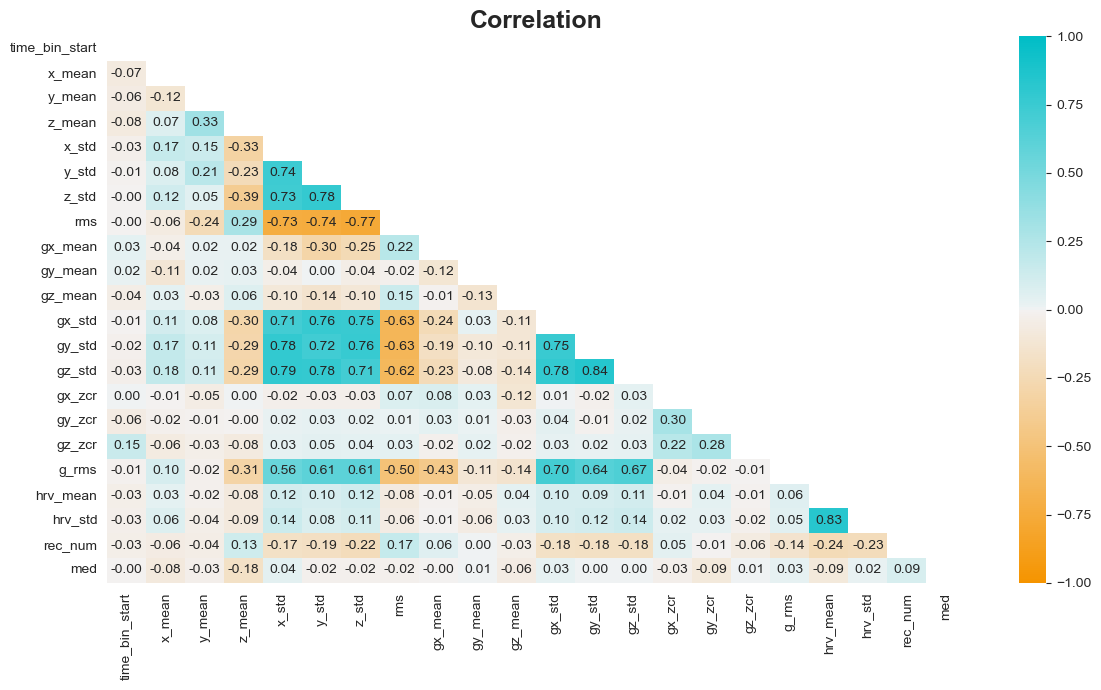

In [7]:
plt.figure(figsize=(12,7))
rect= [0.92, 0.15, 0.03, 0.75]
corr_all = df[cols].corr()
masking1 = corr_all < -0.3
masking2 = corr_all > 0.3
masking3 = corr_all == 1.0
masking = masking1 | masking2 
mask = np.triu(np.ones_like(corr_all[masking], dtype=bool))
shared_cmap = sns.diverging_palette(400, 200, s=100, l=70, as_cmap=True)

sns.heatmap(corr_all, annot=True, fmt='.2f', cmap=shared_cmap, vmin=-1.0, vmax=1.0,
            square=False, cbar=True, mask=mask)  

plt.title("Correlation",fontsize=18,fontweight='bold')
plt.tight_layout()
plt.grid(False)
plt.show()

In [8]:
corr_all[corr_all<corr_all.mean()]
df['hrv_mean_log'] = np.log(df['hrv_mean'])

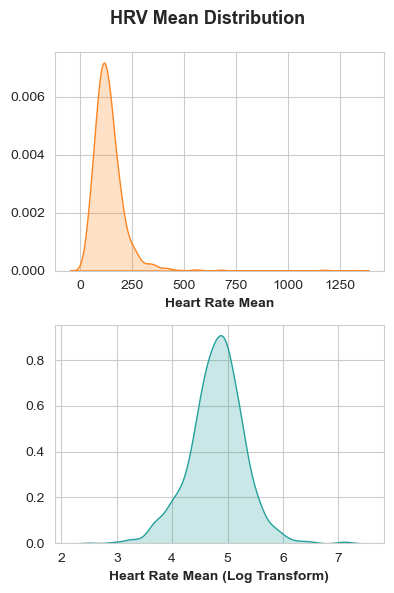

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 6), sharey=False)

axes[0] = sns.kdeplot(data=df, x='hrv_mean', fill=True, common_norm=False,legend=False,ax=axes[0],cumulative=False,color=palette['mid_orange'])
axes[0].set_xlabel('Heart Rate Mean',fontweight='bold')
axes[0].set_ylabel("")
axes[1] = sns.kdeplot(data=df, x='hrv_mean_log',log_scale=False, fill=True, common_norm=False,legend=False,ax=axes[1],color=palette2['green_teel'])
axes[1].set_xlabel('Heart Rate Mean (Log Transform)',fontweight='bold')
axes[1].set_ylabel("")
fig.suptitle("     HRV Mean Distribution", fontsize=13,fontweight='bold')

plt.tight_layout(rect=[0, 0, 1.01, 0.99]) 
plt.show()